# **In Silico Toxicology Modelling**
### February 2024
Authors: Dr Layla Hosseini-Gerami layla[at]ignotalabs.ai | Srijit Seal ss2686[at]cam.ac.uk

In this notebook, we will introduce the core concepts of *in silico* toxicology modelling in Python.

*   In the first section, we will introduce Notebooks and Python

*   Then we'll look at modelling hERG inhibition using a regression model

*   Finally, we'll model mitochondrial toxicity using a classification model

## Data location
Data is in the data/tox_prediction directory of this repo

In [1]:
base_url = 'https://raw.githubusercontent.com/Hitchhikers-AI-Guide/AIGuideToDrugDiscovery/main/data/tox_prediction/'
example_url = f'{base_url}/california_housing_train.csv'
herg_url = f'{base_url}/hERG_IC50.csv'
mitotox_url = f'{base_url}/Mitotox_Dataset_Classification_Workshop.csv'

## Background



### Notebooks

We are using a Jupyter notebook. These:


*   Enable you to put blocks of code, text and visualisations in the same document
*   Are shareable and collaborative
*   Require little to no configuration

This is hence an interactive page where you can write and execute code. Each individual block within this notebook is called a "cell".

---

This cell contains text. Text cells in Notebooks use a simple language called [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

Double click on the cell to edit it and view the Markdown syntax.

With Markdown, you can make text *italic*, **bold**, or even make

*   Bullet
*   Point
*   Lists

The next cell contains Python code. You can press the Play button next to these cells to execute the code. You can also execute a cell by pressing Shift+Enter.

For example, the code cell below will add up a series of numbers and print the result.

In [ ]:
x = 1+2+3
x

6

### Introduction to Python

Python is the most popular language for performing Machine Learning. The syntax is relatively simple compared to other programming languages, and there is a wealth of open-source packages for chemoinformatics analysis.


---




#### Basics: Operations, variables, lists, arrays, dicts and functions

Here are some simple operations in Python language. *Notice that the comment, written after "#" isn't executed as code.*

In [ ]:
# Some operations (this isn't run)
print(10//3)
print(12%5)
print(4**2)

3
2
16


In [ ]:
# x is a variable
x=5
x+=2
print(x)

7


Mini-exercise 1 - create code which takes 3 from 7

**Variables** are used to store information to be referenced and manipulated in a computer program. In the above code, x is an example of a variable.

We can also store collections of data as **lists** or **arrays**.

*   Lists can store strings (text) or values (floats, integers) and also mixtures of different data types.
*   Arrays on the other hand store values, and can be created using the NumPy package.

In the next cell, we will **import** the NumPy package using its alias, np.

In [ ]:
import numpy as np

Next we make a list by putting each element in between square brackets, comma-separated. To make an array, we wrap np.array() around the list of numbers. You can check the type of the list and array by using type().

In [ ]:
list_example = [1, 2, 3, "hello","world"]
array_example = np.array([1, 2, 3, 4])
print(list_example)
print(type(list_example))
print(array_example)
print(type(array_example))

[1, 2, 3, 'hello', 'world']
<class 'list'>
[1 2 3 4]
<class 'numpy.ndarray'>


To get the length of a list, use len.

In [ ]:
len(list_example)

5

To extract an element of a list, you can use its index. Note that in Python numbers are 0-indexed, i.e. the first element has an index of 0

In [ ]:
list_example[0]

1

You can also define functions to save time on repeating code. Let's create a function which adds all even elements of an array. This function uses a for loop and an if/else statement, which we'll explain in the code using comments.

In [ ]:
def array_add(arr): # defining the function and its input (here an array)
  sum=0 # define variable sum and set to 0
  for i in arr: # use a "for loop" to iterate over the array
    if (i%2==0): # check "if" the number is divisible by 2 with no remainders
      sum=sum+i # the sum variable is updated
    else: # if the condition isn't met..
      continue # we skip and continue iterating over the for loop

  return sum # the function ends by returning the sum

Now we can execute the function on two arrays and view the results

In [ ]:
print (array_add(np.array([3,4,5,6])))
print (array_add(np.array([2,3,5,7,10])))

10
12


Another common data type in Python is a dictionary or dict. Dicts are denoted by curly brackets and contain a collection of key-value pairs, which maps keys to their associated values.

The following dictionary maps a location (key) to its corresponding Major League Baseball team (value).
Notice how each key-pair is separated by "," and keys are separated from their values using ":".

In [ ]:
MLB_team = {
 'Colorado' : 'Rockies',
  'Boston'   : 'Red Sox',
  'Minnesota': 'Twins',
  'Milwaukee': 'Brewers',
  'Seattle'  : 'Mariners'}
print(MLB_team.keys())
print(MLB_team.values())
print(type(MLB_team))

dict_keys(['Colorado', 'Boston', 'Minnesota', 'Milwaukee', 'Seattle'])
dict_values(['Rockies', 'Red Sox', 'Twins', 'Brewers', 'Mariners'])
<class 'dict'>


#### Pandas DataFrames

Pandas is a package used to make manipulation of tabular data very easy and intuitive. Let's import it using its alias, pd.

In [ ]:
import pandas as pd

If we have data in lists, where each list contains data for one column, we can create a DataFrame from scratch. To do this, we need to create a dictionary which maps column names (keys) to their corresponding lists (values). Recall the format of a dictionary:

```
{key1 : value1, key2 : value2, key3 : value3, ..., keyn: valuen}
```
Once we have made the dictionary, we use `pd.DataFrame `to create the DataFrame.

In [ ]:
# define the lists
lst1 = ['a','b','c']
lst2 = [1,2,3]
lst3 = ['x','y','z']

# define the column name: column values mapping as a dict
coldict = {'col1' : lst1 , 'col2' : lst2, 'col3' : lst3}

# create the dataframe
df_dict = pd.DataFrame(coldict)
df_dict

,col1,col2,col3
0,a,1,x
1,b,2,y
2,c,3,z


To load tabular data (a .csv file) into a **Pandas DataFrame**, we use the function `read_csv`. Let's read in some sample data from the california housing dataset.

In [ ]:
df = pd.read_csv(example_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


You'll notice that each column has 17000 non-null items, meaning that there is no missing data. Pandas also provides functions to easily remove missing values, which we'll take a look at when we go through the modelling code.

This dataset is intended for modelling "median_house_value" (the response, or target) using the various descriptors. To print all column names, we can do:

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

We can create two new DataFrames only containing the descriptor or target columns by subsetting the original dataframe (outer brackets) using a list of column names (inner brackets). Then, we can use `shape` to get the dimensions of each dataframe.


In [ ]:
df_target = df[['median_house_value']]
df_descriptors = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]

# both dataframes have 17,000 rows
print(df_target.shape) # 1 column (target)
print(df_descriptors.shape) # 8 columns (descriptors)

(17000, 1)
(17000, 8)


Because df_target is a 1D DataFrame, we can convert and store it as a NumPy array. We can get an array out of a column by calling `values`.

In [ ]:
df_target.values

array([[ 66900.],
       [ 80100.],
       [ 85700.],
       ...,
       [103600.],
       [ 85800.],
       [ 94600.]])

NumPy provides a function called `ravel` to create a flat, 1D array, which is what we usually require when defining a target in machine learning.

In [ ]:
array_target = np.ravel(df_target.values)
array_target

array([ 66900.,  80100.,  85700., ..., 103600.,  85800.,  94600.])

We can check the first 5 rows of our original DataFrame using the head() function. Notice that the original df variable has remained the same, because above we have created new variables for the two subsets.

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


We can create summary statistics based on individual columns

In [ ]:
print(df["longitude"].mean())
print(df["latitude"].median())

-119.5621082352941
34.25


Or, using describe() function, we can get a summary of all numerical columns

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Python Packages: RDKit, Scikit-Learn and Seaborn

In this workshop we'll be using three specialist packages

*   RDKit for chemoinformatics analysis (generating descriptors from molecular representations)
*   Scikit-Learn (alias sklearn) for machine learning

*   Seaborn (alias sns) for plotting

Before we get into the modelling exercises, we will briefly introduce each package.


---



#### RDKit

RDKit is a package used for chemoinformatics analysis in Python.

Most of the functionality of RDKit is in the "Chem" module. In Python packages, distinct collections of functionality are kept separate as modules, which can contain sub-modules or functions. We also want to import the AllChem and Draw sub-modules from Chem which can be imported like so:

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem,Draw

RDKit can be used to read in chemical information in different formats, for example SMILES. SMILES stands for **S**implified **M**olecular **I**nput **L**ine **E**ntry **S**ystem), and is one way that computers can read chemical structures. For more information on SMILES, check out [this web link](https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html).

Here some SMILES are read in and converted into a **Mol object** to be manipulated by RDKit's functions.

In [ ]:
mol = Chem.MolFromSmiles('c1cccnc1')
mol

We can draw the mol object directly in the notebook

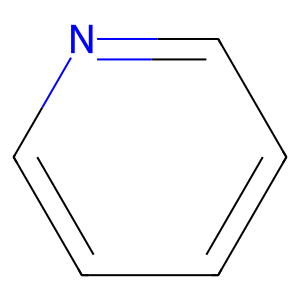

In [ ]:
Draw.MolToImage(mol)

Mol objects can be converted back to SMILES. By default, RDKit outputs canonical SMILES, meaning that the same structure will always have identical SMILES.

Let's return canonical SMILES for the same structure as above, represented as 3 different SMILES strings:

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))

c1ccncc1
c1ccncc1
c1ccncc1


RDKit can be used to calculate or predict various molecular properties.

Let's import the "Descriptors" module and compute the (predicted) LogP, TPSA (Topological Polar Surface Area) and exact molecular weight for a compound.

In [ ]:
# load descriptor module
from rdkit.Chem import Descriptors

# create mol object
mol = Chem.MolFromSmiles('c1ccccc1C(=O)O')

# compute descriptors
print(Descriptors.MolLogP(mol))
print(Descriptors.TPSA(mol))
print(Descriptors.ExactMolWt(mol))

1.3848
37.3
122.036779432


Later, we will generate a range of descriptors to use as input for machine learning

#### Scikit-Learn and Seaborn

Scikit-learn is a package used to carry out machine learning modelling in Python. It's imported using it's alias sklearn.

Earlier, we created two variables based on the California housing dataset, array_target and df_descriptors. We can use these directly in sklearn to build a machine learning model.

First, we need to separate them into two sets, a training set (used to learn the model) and a test set (used to evaluate the model). We can do this using the train_test_split function, which is in the model_selection module.

All we need to do is input our X (descriptors), our y (target), and the size of the test set (here 20%). We can also set a random state or seed, which ensures reproducibility of the resulting split.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_descriptors, array_target, test_size=0.2, random_state=42)

# print the shape for each variable - notice that the flat y arrays don't have a second dimension
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

The function created four new variables, X_train, y_train (used for training), X_test (used for applying the trained model on), and y_test (used for evaluating the prediction). Now we have defined our training set, containng 13,600 data points (80%), and our test set, containing 3,400 data points (20%).

In just a few lines of code, we can fit a model on the training dataset, apply the fitted model to the test set, and evaluate the result in terms of the r2 score between the predicted and true values. Let's use the Random Forest regressor function in the 'ensemble' module of sklearn.

In [ ]:
# The random forest regressor is imported from the 'ensemble' module,
# and the r2_score function is imported from the 'metrics' module
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# define the regression model - random forest regressor
reg = RandomForestRegressor()

# fit the regressor on the training set
reg.fit(X_train,y_train)

# apply the fitted regressor to the test set
y_pred = reg.predict(X_test)

# assess r2 between the predicted and true values
print(r2_score(y_test,y_pred))


It is also possible to visualise the predicted vs actual results. We can do this using the Seaborn package.

In [ ]:
import seaborn as sns

To create the plot, we define a DataFrame of predicted and true values and use the seaborn `scatterplot` function to carry out the plotting.

To create a DataFrame from arrays or lists, recall that we use a dictionary to define the column names and column values.

In [ ]:
pred_df = pd.DataFrame(
    {'True': y_test,
     'Predicted': y_pred
    })
pred_df.head()

,True,Predicted
0,142700.0,148530.00
1,500001.0,476693.56
2,61800.0,93174.00
3,162800.0,150462.00
4,90600.0,98500.00


Now we can pass the DataFrame to the seaborn function.

As input, we need to define the DataFrame (here pred_df), as well as the x and y variables, which correspond to the column names in the DataFrame

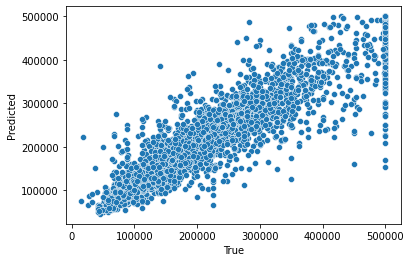

In [ ]:
sns.scatterplot(data=pred_df, x="True", y="Predicted")

We will get into more detail during the exercises, but this should have given you a basic overview of the Scikit-learn package and Seaborn.

### Summary

After this background section, you should be familiar with the basic concepts of Python, including operations, variables, lists, arrays, dicts and functions. We have also explored the Pandas DataFrame for manipulating tabular data, and briefly introduced some functionalities of RDKit, Scikit-Learn and Seaborn.


---




## Exercise 1: Regression modelling hERG IC50

In this exercise we will use Random Forests to model hERG inhibition (in the form of IC50 data).

### Data Cleaning

The first step is to load and clean the dataset.

First, we will read in the data file hERG_IC50.csv. This contains IC50 bioactivity data for the hERG protein target, extracted from [ChEMBL](https://www.ebi.ac.uk/chembl/g/#browse/activities/filter/target_chembl_id%3ACHEMBL240)

In [ ]:
herg_data = pd.read_csv(herg_url)
herg_data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3121096,NaN,0,339.44,0,2.55,"S,R(-)-4b, (1S,6R(-)-4b), S,R-4b",O=C1NN=C(c2ccc(OC3CCN(C4CCC4)CC3)cc2)[C@@H]2C[...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL3120141,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2014.0,None,NaN
1,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,Diltiazem,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1135758,1,Scientific Literature,J. Med. Chem.,2002.0,None,NaN
2,CHEMBL556247,NaN,0,408.42,0,2.77,6,CN1C[C@H]2[C@@H](C1)[C@@H]2CN(Cc1cccc(OC(F)(F)...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1158414,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2009.0,CHEMBL3307715,NaN
3,CHEMBL216959,NaN,0,499.65,0,2.30,4g,O=C1CN(CCc2ccc(F)cc2)CCN1[C@H]1CCc2cc(CN3CCS(=...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1137586,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,None,NaN
4,CHEMBL214969,NaN,0,338.34,0,2.68,8c,COc1ccc2c(=O)n(CCO)c(C#N)c(-c3cccc(F)c3)c2c1,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1137352,1,Scientific Literature,J. Med. Chem.,2006.0,None,NaN


There is a lot of information here. All we need for modelling is the SMILES, standard relation and pChEMBL value (-log10[molar IC50]). Let's subset the dataframe to only contain these columns.

In [ ]:
herg_data_dropped = herg_data[['Smiles','Standard Relation','pChEMBL Value']]
herg_data_dropped.head()

,Smiles,Standard Relation,pChEMBL Value
0,O=C1NN=C(c2ccc(OC3CCN(C4CCC4)CC3)cc2)[C@@H]2C[...,'=',5.22
1,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,'=',4.76
2,CN1C[C@H]2[C@@H](C1)[C@@H]2CN(Cc1cccc(OC(F)(F)...,'=',5.42
3,O=C1CN(CCc2ccc(F)cc2)CCN1[C@H]1CCc2cc(CN3CCS(=...,'=',4.62
4,COc1ccc2c(=O)n(CCO)c(C#N)c(-c3cccc(F)c3)c2c1,'=',4.21


Recall that we can quickly summarise the DataFrame using `info`



In [ ]:
herg_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14364 entries, 0 to 14363
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Smiles             14332 non-null  object 
 1   Standard Relation  12542 non-null  object 
 2   pChEMBL Value      8744 non-null   float64
dtypes: float64(1), object(2)
memory usage: 336.8+ KB


Oh no! It looks like we have lots of missing data. We have 14,364 entries, of which


*   14,332 entries have non-null SMILES
*   12,542 entries have non-null Standard Relations
*   8,744 entries have non-null pChEMBL Values

Clearly we can't use all of these 14,364 entries for machine learning. We need a DataFrame which only contains rows where every column is non-null.

To do this, we can use the Pandas function `dropna` with the 'how' argument set to 'any'. This means that rows which have missing values in **any** column are dropped. The other option here is 'all', which only removes rows if all column values are empty.


In [ ]:
herg_data_dropna = herg_data_dropped.dropna(how='any')
print(herg_data_dropna.shape)

(8744, 3)


After dropping null values, we are left with 8,744 rows.

Next, we only want to include the data for modelling if the Standard Relation is '='.

We can check which Standard Relation symbols are in our DataFrame using `unique` to extract only the unique items in the column.

In [ ]:
std_relations = herg_data_dropna['Standard Relation'].unique()
print(std_relations)


["'='"]


Looks like we don't need to do any cleaning there. The final important thing we need to deal with is duplicate values.

To find how many duplicates we have per compound, we can use the Pandas `groupby` function to group the DataFrame in terms of the 'Smiles' column,`size` to count the number of entries, then finally `sort_values `in descending order.



In [ ]:
herg_data_dropna.groupby(['Smiles']).size().sort_values(ascending=False)

Smiles
CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)cc1              24
COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)CC1OC                     21
COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1                     20
Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2                      20
CN(CCOc1ccc(NS(C)(=O)=O)cc1)CCc1ccc(NS(C)(=O)=O)cc1                    19
                                                                       ..
CO[C@H]1CN(Cc2ccc(C(F)(F)F)cc2)CC[C@H]1N(C)C(=O)Cc1ccc(-n2cnnn2)cc1     1
CO[C@H]1CN(C2CCN(c3nc(N)n[nH]3)CC2)[C@H]1Cc1ccc(Cl)cc1                  1
CO[C@H]1CC[C@H](N2C(=O)CNc3ncc(-c4ccc(C(C)(C)O)nc4)nc32)CC1             1
CO[C@H]1CCN(Cc2c(C)cc(C)c3[nH]ccc23)[C@H](CO)C1                         1
c1ncc(-c2cnc3nc(N4CCC(N5CCCCC5)CC4)sc3c2)cn1                            1
Length: 7412, dtype: int64

The compound with the SMILES C(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)cc1 is present in the dataset 24 times! Notice that the length of the output is 7,412, meaning that there are 7,412 unique SMILES structures in the dataset.

To deal with duplicates, we can again `groupby` SMILES, and this time take the `mean` of the PChEMBL values from the grouped DataFrame.

In [ ]:
# we include 'Standard Relation' in the grouping to keep the column
herg_data_cleaned = herg_data_dropna.groupby(['Smiles','Standard Relation'])['pChEMBL Value'].mean()

# turn it back into DataFrame format
herg_data_cleaned = pd.DataFrame(herg_data_cleaned)
herg_data_cleaned.head()

,,pChEMBL Value
Smiles,Standard Relation,
Br.CN(C)c1ccc(/N=N/c2ccccn2)c(O)c1,'=',6.62
Brc1ccc(Nc2ccc(CN3CCC4(CC3)OCCc3sccc34)cc2)cc1,'=',5.37
Brc1ccc2c(NC3=NC[C@@]4(CN5CCC4CC5)O3)ncnn12,'=',5.60
Brc1cccc2nc(C#Cc3ccccn3)ccc12,'=',4.64
Brc1cnc2nc(N3CCN4CCC3CC4)oc2c1,'=',5.64


Because we used the "Smiles" and "Standard Relation" columns for the grouping, these have become indexes in the DataFrame. With reset_index we can change these back to normal columns

In [ ]:
herg_data_cleaned = herg_data_cleaned.reset_index()
herg_data_cleaned.shape

(7412, 3)

Now we have a non-duplicated dataset of 7,412 unique compounds.

Note that there are other ways to deal with duplicates, for example by discarding outliers before taking the mean, or by taking the median.

Let's see what the distribution of pChEMBL values looks like. We can achieve this using the `violinplot` function in Seaborn. We just need to pass the DataFrame column to the function like so:

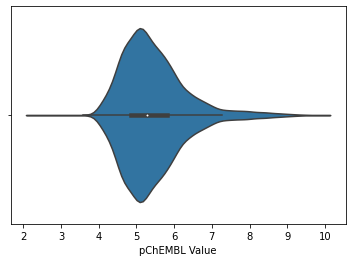

In [ ]:
sns.violinplot(x=herg_data_cleaned["pChEMBL Value"])


From this plot, we can see that most of the pChEMBL values fall around ~5 and span from ~2 to ~10.

We can also use the `describe` function to summarise the pChEMBL value distribution:

In [ ]:
herg_data_cleaned.describe()

,pChEMBL Value
count,7412.000000
mean,5.435863
std,0.859740
min,2.360000
25%,4.850000
50%,5.280000
75%,5.820000
max,9.850000


### Featurisation

Now that the data is clean, we can generate our features.

In this exercise, we will use the RDKit descriptors to featurise our compounds. The following code assigns a list of available descriptors to the variable 'descriptor_names' and prints the length of the list.

In [ ]:
from rdkit.Chem import Descriptors

# get list of all available Descriptors
descriptors_list = [x[0] for x in Descriptors._descList]
print(len(descriptors_list))

208


In [ ]:
descriptors_list

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

Next, we need to set up a calculator to calculate the descriptors. The ML.Descriptors module has a MolecularDescriptorsCalculator to achieve this.

In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors_list)

Once the calc variable is set up, we can calculate all descriptors for a given SMILES string like so:

In [ ]:
mol = Chem.MolFromSmiles('CC1=CC(=C(C=C1NC(=O)C2=C(C(=CC(=C2)I)I)O)Cl)C(C#N)C3=CC=C(C=C3)Cl')
ds = calc.CalcDescriptors(mol)
print(ds)
print(len(ds))

(12.745535497884882, -0.5698675869184535, 12.745535497884882, 0.06836196299558472, 0.29235676951522827, 663.0799999999998, 648.9679999999996, 661.852179048, 152, 0, 0.25900360274825185, -0.5060008092821509, 0.5060008092821509, 0.25900360274825185, 1.1333333333333333, 1.8, 2.433333333333333, 126.91372280364142, 9.909169638943911, 2.2033206905749614, -2.1638525434100515, 2.348327336498206, -2.139744538898049, 14.113673859085008, 0.10192938146936481, 1.9402256061221343, 1175.2355472715938, 21.999271042140983, 15.510685796207323, 21.337540270596875, 14.20561635580521, 8.654060372339206, 11.567487609533984, 6.540209173088069, 9.791667981874944, 4.508130316967467, 6.532560560468579, 2.9673141998441293, 5.210790706092031, -1.5399999999999987, 3810408.214481713, 23.130028268670063, 9.726157452179187, 5.018674352279847, 211.0337664023786, 10.423315998847038, 5.749511833283905, 0.0, 0.0, 5.907179729351506, 0.0, 4.794537184071822, 0.0, 5.261891554738487, 0.0, 41.40098098584986, 99.12766827122579,

Let's create a for loop to iterate over each SMILES string in our dataset and return the descriptors. Warning: This takes a moment to run!

In [ ]:
all_smiles = herg_data_cleaned['Smiles'].tolist()
all_descriptors = [] # initiate an empty list
for smi in all_smiles: # iterate over each SMILE
    mol = Chem.MolFromSmiles(smi) # turn into mol object
    ds = calc.CalcDescriptors(mol) # calculate descriptors
    all_descriptors.append(ds) # append descriptors to the list

Now we want the descriptors in the format of a DataFrame for Machine Learning, where each row is a data point (compound) and each column is a descriptor. To do this, we just call pd.DataFrame on the list of calculated descriptors, and each item in the list will be transformed into a row of the DataFrame.

In [ ]:
desc_df = pd.DataFrame(all_descriptors)
desc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,9.817425,0.000000,9.817425,0.000000,0.872960,323.194,308.074,322.042923,100,0,...,0,0,0,0,0,0,0,0,0,0
1,6.338218,-0.025259,6.338218,0.025259,0.484215,469.448,444.248,468.087097,150,0,...,0,0,0,0,0,0,0,1,0,0
2,6.299302,-0.134200,6.299302,0.134200,0.820526,377.246,360.110,376.064721,120,0,...,0,0,0,0,0,0,0,0,0,0
3,4.519728,0.746531,4.519728,0.746531,0.590471,309.166,300.094,307.994910,90,0,...,0,0,0,0,0,0,0,0,0,0
4,5.898287,0.565049,5.898287,0.565049,0.805555,323.194,308.074,322.042923,100,0,...,0,0,0,0,0,0,0,0,0,0


To understand feature importance later, we need to set the DataFrame column names to correspond to each descriptor. Since we already have the descriptor names stored in a list, we assign the .columns attribute of the DataFrame to the list.

In [ ]:
desc_df.columns = descriptors_list
desc_df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,9.817425,0.000000,9.817425,0.000000,0.872960,323.194,308.074,322.042923,100,0,...,0,0,0,0,0,0,0,0,0,0
1,6.338218,-0.025259,6.338218,0.025259,0.484215,469.448,444.248,468.087097,150,0,...,0,0,0,0,0,0,0,1,0,0
2,6.299302,-0.134200,6.299302,0.134200,0.820526,377.246,360.110,376.064721,120,0,...,0,0,0,0,0,0,0,0,0,0
3,4.519728,0.746531,4.519728,0.746531,0.590471,309.166,300.094,307.994910,90,0,...,0,0,0,0,0,0,0,0,0,0
4,5.898287,0.565049,5.898287,0.565049,0.805555,323.194,308.074,322.042923,100,0,...,0,0,0,0,0,0,0,0,0,0


Now we have our features in the correct format for modelling!

When calculating descriptors its possible that some calculations will fail, resulting in null values for some compound-descriptor combinations. To remove columns where there are null values present in any row, we can use dropna again. This time, we pass axis=1 to indicate that we want to drop columns, not rows.

In [ ]:
desc_df = desc_df.dropna(axis=1,how='any')
desc_df.shape

(7412, 200)

8 descriptors were dropped due to null values.

### Model training

Now we have cleaned the data and calculated our descriptors, we can proceed with modelling.

Let's start with performing a train-test split. We first need our pChEMBL values in the form of a 1D array. Recall the code from before:

In [ ]:
pchembl_array = np.ravel(herg_data_cleaned['pChEMBL Value'].values)
pchembl_array

array([6.62, 5.37, 5.6 , ..., 4.92, 5.19, 4.63])

Now we can use `train_test_split` to define our X_train, y_train, X_test and y_test. Let's use an 80:20 split again.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(desc_df, pchembl_array, test_size=0.2, random_state=42)

Now we have split the data, we can train a Random Forest Regressor. Warning: This takes a moment to run!

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

Next, we apply the model to the test dataset descriptors (X_test) and store the results in a variable called y_pred.

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([5.74111333, 5.20088333, 5.19325   , ..., 5.01271667, 5.47675   ,
       4.8804    ])

How well has our model performed? Let's calculate the r2 and mean absolute error

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(r2)
print(mae)

0.5105055624372814
0.44245722813910965


The model has an r2 score of 0.51 and a mean absolute error of 0.44. Let's visualise the true vs the predicted values.

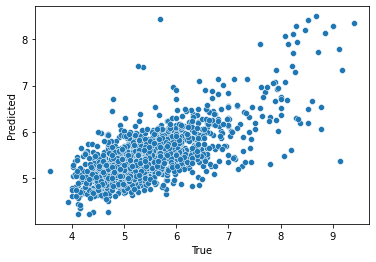

In [ ]:
import seaborn as sns
pred_df = pd.DataFrame(
    {'True': y_test,
     'Predicted': y_pred
    })
sns.scatterplot(data=pred_df, x="True", y="Predicted")

Model performance can be improved using hyperparameter optimisation. We will cover this in the next exercise

### Model interpretation

We can interpret the model in a number of ways. Here we will use SHAP values to understand the contribution of each feature to the model.

To do this, we use the shap library. The TreeExplainer is fit using the trained model, and the shap values are computed for the test set. Finally, a summary plot is created. Warning: Takes some time to compute Shap values

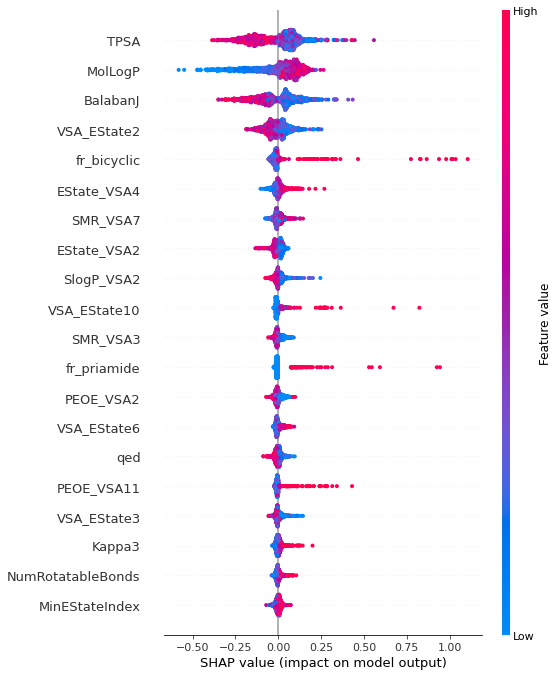

In [ ]:
import shap

# explain all the predictions in the test set
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

The most important features are TPSA and LogP. As the value of TPSA increases the predicted hERG pIC50 decreases, vice versa for LogP.

According to our model, to develop a new compound without hERG liability, we should ensure that the TPSA is high and the LogP is low. In reality it's more complex than that, but we have a starting point to understand why the model is making these predictions and how we can avoid developing toxic compounds in the future.

Now you have succesfully trained a hERG prediction model and visualised the feature importance!

## Exercise 2: Classification modelling Mitochondrial Toxicity

We will now look at a classification task. We will try to predict if a compound is toxic to the mitochondrial outer membrane using chemical structure. The chemical structure is represented by bit vector of Morgan Fingerprints.

For this purpose we will follow the steps below in order

1. Load the dataset
2. Standardise smiles
3. Generate Fingerprints
4. Split data into train and test
6. Hyperparamter optimisation of Random Forest model using training data
6. Evaluate on test data

### Load the dataset

In [ ]:
import rdkit
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(mitotox_url)
df

,InChICode_standardised,Activity
0,InChI=1S/C10H19N5S/c1-6(2)11-8-13-9(12-7(3)4)1...,0.0
1,InChI=1S/C12H10O4/c13-11(14)7-5-9-1-2-10(4-3-9...,0.0
2,InChI=1S/C12H16O/c13-12-9-5-4-8-11(12)10-6-2-1...,0.0
3,InChI=1S/C10H20O/c1-2-3-4-5-6-7-8-10-9-11-10/h...,0.0
4,InChI=1S/C16H13ClN2O/c1-19-14-8-7-12(17)9-13(1...,0.0
...,...,...
6455,InChI=1S/C10H18O/c1-7(2)9-5-4-8(3)6-10(9)11/h8...,0.0
6456,InChI=1S/C18H16N2O3/c19-12-15(10-14-6-7-16(21)...,1.0
6457,"InChI=1S/C8H7NO2S/c9-12(10,11)7-6-8-4-2-1-3-5-...",0.0
6458,"InChI=1S/C14H20O2/c1-13(2,3)9-7-12(16)10(8-11(...",0.0


value_counts() shows us the number of datapoints in each class of the dataset, in this case, 916 toxic compounds and 5544 non-toxic compounds.

In [ ]:
df.Activity.value_counts()

0.0    5544
1.0     916
Name: Activity, dtype: int64

### Standardise SMILES

Below are two functions:

The first one standardised_smile_from_inchi() converts InChi code (which  is the identfier in the dataset) into SMILES (which is more commonly used to generate fingerprints)

The second function standardize(), performs various standardisation functions to return a standardised smiles.This includes deprotonation, normalisation, reionisation, neutralisation, tautomer canonicalisation etc.

The try, except combination allows for error handling, and returns "Cannot_do" if the functions fail for a particular molecule.

In [ ]:
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem import inchi
from rdkit import Chem

def standardised_smile_from_inchi(value):

    try: return Chem.MolToSmiles(inchi.MolFromInchi(value))
    except: return "Cannot_do"

def standardize(smiles):
    # follows the steps in
    # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
    # as described **excellently** (by Greg) in
    # https://www.youtube.com/watch?v=eWTApNX8dJQ
    try:
        mol = Chem.MolFromSmiles(smiles)

        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)

        # if many fragments, get the "parent" (the actual mol we are interested in)
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)

        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger() # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)

        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.

        te = rdMolStandardize.TautomerEnumerator() # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)

        return  Chem.MolToSmiles(taut_uncharged_parent_clean_mol)

    except:

        return "Cannot_do"



We apply both these functions to the respective columns in the dataframe. First standardised_smile_from_inchi() converts InChICode_standardised to smiles. Then the second function standardize() converts smiles to smiles_r.

In [ ]:
df["smiles"] = df["InChICode_standardised"].apply(standardised_smile_from_inchi)
df["smiles_r"] = df["smiles"].apply(standardize)
df

,InChICode_standardised,Activity,smiles,smiles_r
0,InChI=1S/C10H19N5S/c1-6(2)11-8-13-9(12-7(3)4)1...,0.0,CSc1nc(=NC(C)C)[nH]c(=NC(C)C)[nH]1,CSc1nc(NC(C)C)nc(NC(C)C)n1
1,InChI=1S/C12H10O4/c13-11(14)7-5-9-1-2-10(4-3-9...,0.0,O=C(O)/C=C/c1ccc(/C=C/C(=O)O)cc1,O=C(O)/C=C/c1ccc(/C=C/C(=O)O)cc1
2,InChI=1S/C12H16O/c13-12-9-5-4-8-11(12)10-6-2-1...,0.0,OC1CCCCC1c1ccccc1,OC1CCCCC1c1ccccc1
3,InChI=1S/C10H20O/c1-2-3-4-5-6-7-8-10-9-11-10/h...,0.0,CCCCCCCCC1CO1,CCCCCCCCC1CO1
4,InChI=1S/C16H13ClN2O/c1-19-14-8-7-12(17)9-13(1...,0.0,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21
...,...,...,...,...
6455,InChI=1S/C10H18O/c1-7(2)9-5-4-8(3)6-10(9)11/h8...,0.0,C=C(C)C1CCC(C)CC1O,C=C(C)C1CCC(C)CC1O
6456,InChI=1S/C18H16N2O3/c19-12-15(10-14-6-7-16(21)...,1.0,N#C/C(=C\c1ccc(O)c(O)c1)C(O)=NCCc1ccccc1,N#CC(=Cc1ccc(O)c(O)c1)C(=O)NCCc1ccccc1
6457,"InChI=1S/C8H7NO2S/c9-12(10,11)7-6-8-4-2-1-3-5-...",0.0,NS(=O)(=O)C#Cc1ccccc1,NS(=O)(=O)C#Cc1ccccc1
6458,"InChI=1S/C14H20O2/c1-13(2,3)9-7-12(16)10(8-11(...",0.0,CC(C)(C)C1=CC(=O)C(C(C)(C)C)=CC1=O,CC(C)(C)C1=CC(=O)C(C(C)(C)C)=CC1=O


Next we remove compounds for which standardisation of smiles failed!

In [ ]:
df = df[df["smiles_r"]!="Cannot_do"].reset_index(drop=True)


There maybe duplicates here, where the same standardised SMILES may have different activity. For example, sodium salt of benzoic acid and benzoic acid have the same standardised SMILES (bacause we remove salts during standardisation). In that case, we look for evidence of activity and if either compound was toxic, we mark the standardised SMILES as toxic.

In [ ]:
df = df.sort_values(by="Activity", ascending=False)
df

,InChICode_standardised,Activity,smiles,smiles_r
3222,InChI=1S/C19H17ClN2O4/c1-3-24-19(23)12(2)25-14...,1.0,CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1,CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1
2666,InChI=1S/C14H11NO5/c1-8-2-4-9(5-3-8)13(17)10-6...,1.0,Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1,Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1
2718,"InChI=1S/C28H33ClN2/c1-28(2,3)25-13-9-22(10-14...",1.0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...
2709,InChI=1S/C15H13N3O4S/c1-18-13(15(20)17-12-8-4-...,1.0,CN1C(C(O)=Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O,CN1C(C(=O)Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O
2705,InChI=1S/C41H40N4O8/c1-9-23-20(2)29-17-34-27-1...,1.0,C=CC1=C(C)/C2=C/C3=N/C(=C\C4=N/C(=C\C5=N/C(=C\...,C=Cc1c(C)c2[nH]c1=Cc1[nH]c(c(C=CC(=O)OC)c1C)C=...
...,...,...,...,...
2700,InChI=1S/C16H32O2/c1-3-5-6-7-8-9-10-11-12-13-1...,0.0,CCCCCCCCCCCCCC(=O)OCC,CCCCCCCCCCCCCC(=O)OCC
530,InChI=1S/C22H25N2OS/c25-22-23(14-17-8-3-1-4-9-...,0.0,O=C1N(Cc2ccccc2)C2C[S+]3CCCC3C2N1Cc1ccccc1,O=C1N(Cc2ccccc2)C2C[S+]3CCCC3C2N1Cc1ccccc1
2698,InChI=1S/C10H18O/c1-2-3-4-5-6-7-8-9-10-11/h8-1...,0.0,CCCCCCC/C=C/C=O,CCCCCCC/C=C/C=O
2697,InChI=1S/C14H14N8O4S3/c1-6-17-18-14(29-6)28-4-...,0.0,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](N=C(O)Cn4cn...,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)[...


Look at the code above, we have sorted it by activity. Below, you will see, we dropped the duplicates, and among all duplicates, we kept the one that appears aboce in the dataset (which should be the toxic compound if any)

In [ ]:
df = df.drop_duplicates(subset=["smiles_r"], keep="first").reset_index(drop=True)
df

,InChICode_standardised,Activity,smiles,smiles_r
0,InChI=1S/C19H17ClN2O4/c1-3-24-19(23)12(2)25-14...,1.0,CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1,CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1
1,InChI=1S/C14H11NO5/c1-8-2-4-9(5-3-8)13(17)10-6...,1.0,Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1,Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1
2,"InChI=1S/C28H33ClN2/c1-28(2,3)25-13-9-22(10-14...",1.0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...
3,InChI=1S/C15H13N3O4S/c1-18-13(15(20)17-12-8-4-...,1.0,CN1C(C(O)=Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O,CN1C(C(=O)Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O
4,InChI=1S/C41H40N4O8/c1-9-23-20(2)29-17-34-27-1...,1.0,C=CC1=C(C)/C2=C/C3=N/C(=C\C4=N/C(=C\C5=N/C(=C\...,C=Cc1c(C)c2[nH]c1=Cc1[nH]c(c(C=CC(=O)OC)c1C)C=...
...,...,...,...,...
6427,InChI=1S/C16H32O2/c1-3-5-6-7-8-9-10-11-12-13-1...,0.0,CCCCCCCCCCCCCC(=O)OCC,CCCCCCCCCCCCCC(=O)OCC
6428,InChI=1S/C22H25N2OS/c25-22-23(14-17-8-3-1-4-9-...,0.0,O=C1N(Cc2ccccc2)C2C[S+]3CCCC3C2N1Cc1ccccc1,O=C1N(Cc2ccccc2)C2C[S+]3CCCC3C2N1Cc1ccccc1
6429,InChI=1S/C10H18O/c1-2-3-4-5-6-7-8-9-10-11/h8-1...,0.0,CCCCCCC/C=C/C=O,CCCCCCC/C=C/C=O
6430,InChI=1S/C14H14N8O4S3/c1-6-17-18-14(29-6)28-4-...,0.0,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](N=C(O)Cn4cn...,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)[...


We are now therefore left with 6433 compounds in this dataset.

In [ ]:
df.Activity.value_counts()

0.0    5517
1.0     915
Name: Activity, dtype: int64

of which 915 are active (toxic) and 5518 are inactive (non-toxic)

### Generate Fingerprints

Next, we will generate Morgan fingerprints for all compounds in the dataset. So we first create Mol objeects for each smiles

In [ ]:
Ser_Mol = df['smiles_r'].apply(Chem.MolFromSmiles)



The rdkit package has a function to generate Morgan Fingerprint As Bit Vector. We will first import the function

In [ ]:
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect

The cell below uses the function from rdkit to generate morgan fingerprints. The length of the fingerprints is 2048 bits, so each molecule has 2048 binary digits corresponding to substructures that may be present in that compound. These binary bit vectors are used as features in the model.

In [ ]:
Morgan_fingerprint= Ser_Mol.apply(GetMorganFingerprintAsBitVect, args=(2, 2048))

df["Morgan_fingerprint"] =Morgan_fingerprint
df

,InChICode_standardised,Activity,smiles,smiles_r,Morgan_fingerprint
0,InChI=1S/C19H17ClN2O4/c1-3-24-19(23)12(2)25-14...,1.0,CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1,CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,InChI=1S/C14H11NO5/c1-8-2-4-9(5-3-8)13(17)10-6...,1.0,Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1,Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,"InChI=1S/C28H33ClN2/c1-28(2,3)25-13-9-22(10-14...",1.0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/C15H13N3O4S/c1-18-13(15(20)17-12-8-4-...,1.0,CN1C(C(O)=Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O,CN1C(C(=O)Nc2ccccn2)C(=O)c2ccccc2S1(=O)=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/C41H40N4O8/c1-9-23-20(2)29-17-34-27-1...,1.0,C=CC1=C(C)/C2=C/C3=N/C(=C\C4=N/C(=C\C5=N/C(=C\...,C=Cc1c(C)c2[nH]c1=Cc1[nH]c(c(C=CC(=O)OC)c1C)C=...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
6427,InChI=1S/C16H32O2/c1-3-5-6-7-8-9-10-11-12-13-1...,0.0,CCCCCCCCCCCCCC(=O)OCC,CCCCCCCCCCCCCC(=O)OCC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6428,InChI=1S/C22H25N2OS/c25-22-23(14-17-8-3-1-4-9-...,0.0,O=C1N(Cc2ccccc2)C2C[S+]3CCCC3C2N1Cc1ccccc1,O=C1N(Cc2ccccc2)C2C[S+]3CCCC3C2N1Cc1ccccc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6429,InChI=1S/C10H18O/c1-2-3-4-5-6-7-8-9-10-11/h8-1...,0.0,CCCCCCC/C=C/C=O,CCCCCCC/C=C/C=O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6430,InChI=1S/C14H14N8O4S3/c1-6-17-18-14(29-6)28-4-...,0.0,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](N=C(O)Cn4cn...,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)C(NC(=O)Cn4cnnn4)[...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Here we create names for the features: Mfp0, Mfp1 through to Mfp2047.

In [ ]:
Morgan_featurenames  = []
for x in range(0,2048):
    x = "Mfp"+str(x)
    Morgan_featurenames.append(x)

The cell below explains which variable/df is used for what in a ML model.

We are using the dataframe df, where the features which the ML model learns from is stored in the column "Morgan_fingerprint" and endpoints which is to be predicted is stored in the column "Activity".

In [ ]:
data = df
features = "Morgan_fingerprint"
endpoint="Activity"

print(endpoint)

X = np.array([x for x in df['Morgan_fingerprint']])
y = data[endpoint]

Activity


Here X are the featrures and they are binary. Look at the shape of this ndarrary.

There are 6432 compounds in total and each compounds has 2048 features.

In [ ]:
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(6432, 2048)

The same can be seen in y, each compound is associated to an activity.

In [ ]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6427    0.0
6428    0.0
6429    0.0
6430    0.0
6431    0.0
Name: Activity, Length: 6432, dtype: float64

In [ ]:
y.shape

(6432,)

### Split data into training and test data

Now for training a model we muyst split our dataset into train and test. This time we have a classification task. So we must ensure the _distribution_ of classes (toxic and non-toxic)remain same in both test and train.

Note the keywords here:

stratify: this means the splitting will make sure each of train and test dataset contains same proportion of both the classes.

test_size: We have selected 20% of the data to be in the test set and 75% of the data in the training dataset

random_state: Finally, this splitting will happen randomly. But to ensure this split is same for all of use, we have set a random_state. If you feel adventurous, do go ahead and change this 42 to another number. Everything will remain the same except you might find results will vary a litte.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Our splitting is now complete. The function has split our training data (4824 compounds) and test data (1608 compounds)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4824, 2048)
(1608, 2048)
(4824,)
(1608,)


of which the train dat contains 686 toxic compounds and test data contains 229 compounds. Can you check if this is the same ratio  to each other and the original data?

In [ ]:
y_train.value_counts()

0.0    4138
1.0     686
Name: Activity, dtype: int64

In [ ]:
y_test.value_counts()

0.0    1379
1.0     229
Name: Activity, dtype: int64

### Hyperparamter optimisation of Random Forest model using training data

We are going to use a Random Forest Classifier to classify mitochondiral toxicty. We will perform a 5 fold grid search cross validation to optimise the parameters of the Classifier.

We can choose between 200 and 300 trees, maximum features to be used in these trees, the minimum samples to split a node, the masimum depth of a tree.

The taining data will be split into 5 groups and 4 of these will be trained on models varying these parameters. This will be repeated 5 times and the best performing model's parameters are stored in the best_estimator_.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42, n_jobs=-1)

param_grid = {
            "n_estimators": [200,300],
            "max_features": ["sqrt", "log2"],
            "min_samples_split": [2,4],
            "max_depth": [3, 5],
            "bootstrap": [True],
            'n_jobs': [-1],
            "class_weight": ["balanced"]
            }

gsh = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs=-1, verbose = 1)


In [ ]:
##MODELS
print(f"Running ____________________{endpoint} MODELS")

gsh.fit(X_train, y_train)
#print(gsh.best_estimator_)

#HeldOutTest
classifier = gsh.best_estimator_

Running ____________________Activity MODELS
Fitting 5 folds for each of 16 candidates, totalling 80 fits


So this is the best model that will now be trained on the entire training data.

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2', n_estimators=200, n_jobs=-1,
                       random_state=42)

### Evaluate on test data

We will now evaluate our model on the test data and predict the outcome and an associated probability.

The default thrshold is 0.50

If the proba is more than 0.50, the prediction is true (toxic), else false (non-toxic)

In [ ]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.metrics import average_precision_score


y_prob= classifier.predict_proba(X_test)[:,1]
y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[1156  223]
 [  75  154]]


The confusion matrix above shows the outcome of our model

* 1156 out of 1379 were corrective predicted non toxic (true negative)
* 223 out of 1379 were incorrective predicted non toxic (false negative)
* 75 out of 229 were incorrective predicted toxic (false positive)
* 154 out of 229 were corrective predicted toxic (true positive)


The classification report shows for each class, the precision, recall and F1-score alongwith the accuracy (macro and weighted averaged)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      1379
         1.0       0.41      0.67      0.51       229

    accuracy                           0.81      1608
   macro avg       0.67      0.76      0.70      1608
weighted avg       0.86      0.81      0.83      1608



This is the balanced accuracy (balanced for each class)



In [ ]:
ba= balanced_accuracy_score(y_test, y_pred)
print('balanced_accuracy_score ',ba)

balanced_accuracy_score  0.7553888489538967


The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.

In [ ]:
mcc=matthews_corrcoef(y_test, y_pred)
print('matthews_corrcoef ',mcc)

matthews_corrcoef  0.4213394258234649


Sensitivity and specificity mathematically describe the accuracy of a test which reports the presence or absence of a condition. Individuals for which the condition is satisfied are considered "positive" and those for which it is not are considered "negative".

Sensitivity (true positive rate) refers to the probability of a positive test, conditioned on truly being positive.

Specificity (true negative rate) refers to the probability of a negative test, conditioned on truly being negative.

In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
Specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])

In [ ]:
# Specificity or true negative rate
Sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print( 'Sensitivity', Sensitivity)
print( 'Specificity', Specificity)



Sensitivity 0.6724890829694323
Specificity 0.8382886149383612


The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)



In [ ]:
f1= f1_score(y_test, y_pred, average='binary')
print('F1 Toxic', f1)

F1 Toxic 0.5082508250825082


A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

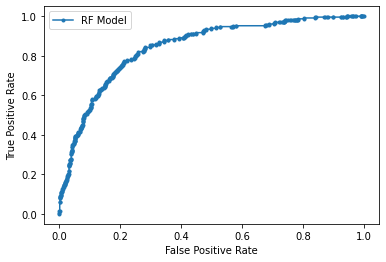

AUC-ROC  0.8437621718161695


In [ ]:
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_test, y_prob)
plt.plot(best_model_fpr, best_model_tpr, marker='.', label='RF Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC = roc_auc_score(y_test, y_prob)
print('AUC-ROC ',AUC)


In [ ]:
classifier

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2', n_estimators=200, n_jobs=-1,
                       random_state=42)

So what does it look like... the Random forest? Well its composed of various trees and this is the first one shown below:

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(classifier.estimators_[0], X_train, y_train,
               target_name="endpoint",
               feature_names=Morgan_featurenames,
               class_names=["Non-Toxic", "Toxic"])



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


See how the tree splits based on certain bits and ultimately leads to nodes. Each leaf node is then assigned a class. The Random Forest works on the wisdom of the crowd, or average voting of all the trees.

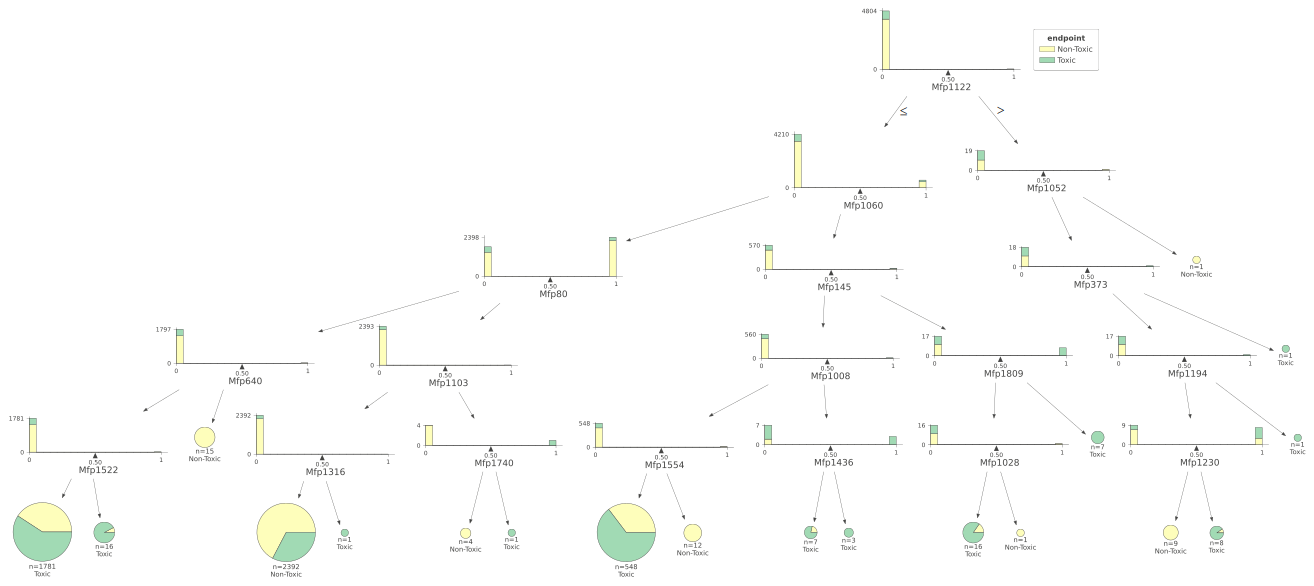

In [ ]:
viz

### Feature Importances

Finally, we evaluate the importance of features on the classification task. The blue bars are the feature importances of the forest.

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the meanof accumulation of the impurity decrease within each tree.

In [ ]:
importances = classifier.feature_importances_
importances

array([0.00020032, 0.00039464, 0.00037688, ..., 0.        , 0.00077745,
       0.        ])

In [ ]:
forest_importances = pd.Series(importances, index=Morgan_featurenames)
forest_importances = forest_importances.sort_values(ascending=False)[:100]
forest_importances


Mfp1380    0.031279
Mfp1602    0.019295
Mfp875     0.016750
Mfp1873    0.016326
Mfp1313    0.014134
             ...   
Mfp1019    0.002265
Mfp1382    0.002252
Mfp674     0.002252
Mfp973     0.002246
Mfp635     0.002244
Length: 100, dtype: float64

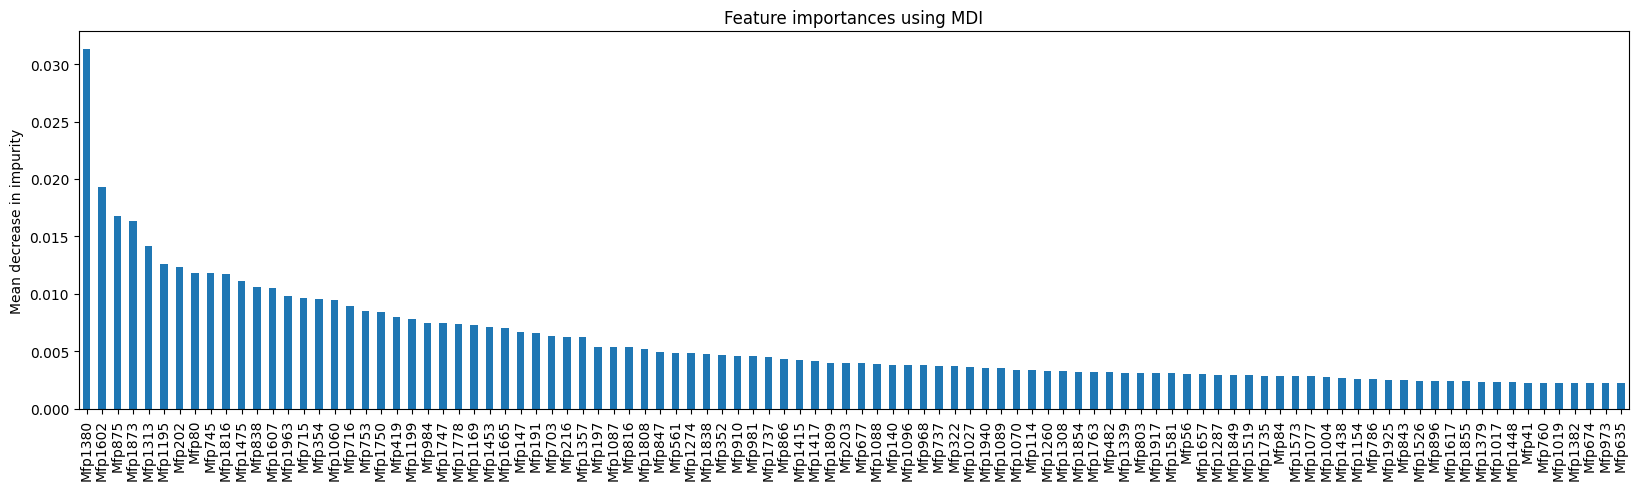

In [ ]:
#We ar eonly plotting the top 100 features here

plt.figure(figsize=(20,5), dpi=100)
forest_importances.plot.bar()
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show()


Thank you!